<a href="https://colab.research.google.com/github/ferdyfebriyanto/PCVK_Genap_2022/blob/main/Tugas%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

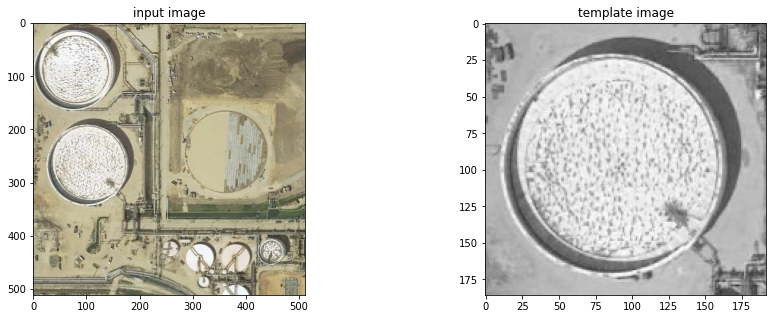

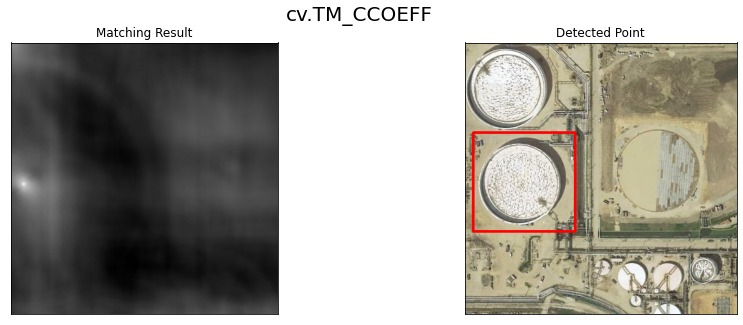

In [5]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/TugasProject/Oil Storage Tanks/01_6_5.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img2 = img.copy()
template = cv.imread('/content/drive/MyDrive/PCVK_MM/TugasProject/Oil Storage Tanks/template-oil-storage.jpg',0)
w, h = template.shape[::-1]

f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template 
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 1 methods for comparison in a list
methods = ['cv.TM_CCOEFF']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv.rectangle(img,top_left, bottom_right,(0,0,255), 3)
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

In [7]:
import os
import numpy as np
import cv2
import pickle
import argparse
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.widgets import PolygonSelector
from matplotlib.collections import PatchCollection
from shapely.geometry import box
from shapely.geometry import Polygon as shapely_poly

points = []
prev_points = []
patches = []
total_points = []
breaker = False

class SelectFromCollection(object):
    def __init__(self, ax):
        self.canvas = ax.figure.canvas
        self.poly = PolygonSelector(ax, self.onselect)
        self.ind = []

    def onselect(self, verts):
        global points
        points = verts
        self.canvas.draw_idle()

    def disconnect(self):
        self.poly.disconnect_events()
        self.canvas.draw_idle()

def break_loop(event):
    global breaker
    global globSelect
    global savePath
    if event.key == 'b':
        globSelect.disconnect()
        if os.path.exists(savePath):
            os.remove(savePath)

        print("data saved in "+ savePath + " file")    
        with open(savePath, 'wb') as f:
            pickle.dump(total_points, f, protocol=pickle.HIGHEST_PROTOCOL)
            exit()

def onkeypress(event):
    global points, prev_points, total_points
    if event.key == 'n': 
        pts = np.array(points, dtype=np.int32)   
        if points != prev_points and len(set(points)) == 4:
            print("Points : "+str(pts))
            patches.append(Polygon(pts))
            total_points.append(pts)
            prev_points = points

if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('video_path', help="Path of video file")
    parser.add_argument('--out_file', help="Name of the output file", default="regions.p")
    args = parser.parse_args()

    global globSelect
    global savePath
    savePath = args.out_file if args.out_file.endswith(".p") else args.out_file+".p"

    print("\n> Select a region in the figure by enclosing them within a quadrilateral.")
    print("> Press the 'f' key to go full screen.")
    print("> Press the 'esc' key to discard current quadrilateral.")
    print("> Try holding the 'shift' key to move all of the vertices.")
    print("> Try holding the 'ctrl' key to move a single vertex.")
    print("> After marking a quadrilateral press 'n' to save current quadrilateral and then press 'q' to start marking a new quadrilateral")
    print("> When you are done press 'b' to Exit the program\n")
    
    video_capture = cv2.VideoCapture(args.video_path)
    cnt=0
    rgb_image = None
    while video_capture.isOpened():
        success, frame = video_capture.read()
        if not success:
            break
        if cnt == 5:
            rgb_image = frame[:, :, ::-1]
        cnt += 1
    video_capture.release()
        
    while True:
        fig, ax = plt.subplots()
        image = rgb_image
        ax.imshow(image)
    
        p = PatchCollection(patches, alpha=0.7)
        p.set_array(10*np.ones(len(patches)))
        ax.add_collection(p)
            
        globSelect = SelectFromCollection(ax)
        bbox = plt.connect('key_press_event', onkeypress)
        break_event = plt.connect('key_press_event', break_loop)
        plt.show()
        globSelect.disconnect()

usage: ipykernel_launcher.py [-h] [--out_file OUT_FILE] video_path
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
